# US Accidents Exploratory Data Analysis

* Data Source : https://www.kaggle.com/sobhanmoosavi/us-accidents
* Data Description : Information about state wise accidents in US from sources like 'MapQuest' and  'Bing'
* Check the possible causes of accidents and see if any actionable insights can be inferred after analysis.


In [2]:
pip install opendatasets --upgrade --quiet

## Downloading and Importing the Data

In [3]:
# Downlading data using opendatasets library to pull online data from kaggle to google drive
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amax00
Your Kaggle Key: ··········


  2%|▏         | 5.00M/299M [00:00<00:06, 51.3MB/s]

100%|██████████| 299M/299M [00:02<00:00, 120MB/s]


In [4]:
data_filename = './us-accidents/US_Accidents_Dec20.csv'

### Import necessary libraries

In [5]:
import pandas as pd

## Data Preparation and Cleaning
1. Load the dataset using pandas.
2. Take a look at the statistical summaries of the data columns.
3. Fix any missing or incorrect values.
4. Convert the datatypes of mislabeled attributes to appropriate datatypes.

In [6]:
# Loading the dataset using pandas
df = pd.read_csv(data_filename)

In [7]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
# Checking out the statistical summaries of the numerical columns
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [10]:
# Checking out the number of numeric columns
numerics = ['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

15

* As we can see above there are 15 numeric columns as of now in the dataset.

In [11]:
missing_percentages = 100*df.isnull().mean().sort_values(ascending = False)

In [12]:
type(missing_percentages)

pandas.core.series.Series

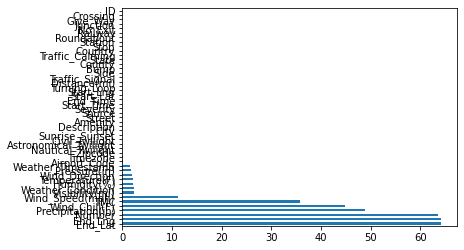

In [13]:
# Finding columns with missing values
missing_percentages.plot(kind = 'barh')

* The above plot captures data for all the columns even columns with 'zero' missing values.

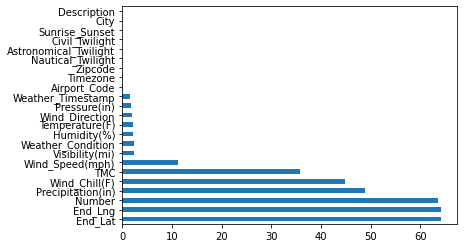

In [14]:
# Finding the subset of only columns with missing missing values
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

* The above plot captures only columns with missing missing values, the bars represent the numbers of missing values (in percentages).

In [15]:
# Checking for null values
100*df.isnull().mean()

ID                        0.000000
Source                    0.000000
TMC                      35.819240
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  64.180760
End_Lng                  64.180760
Distance(mi)              0.000000
Description               0.000047
Number                   63.506745
Street                    0.000000
Side                      0.000000
City                      0.003237
County                    0.000000
State                     0.000000
Zipcode                   0.030525
Country                   0.000000
Timezone                  0.109036
Airport_Code              0.212000
Weather_Timestamp         1.480057
Temperature(F)            2.124020
Wind_Chill(F)            44.795809
Humidity(%)               2.255548
Pressure(in)              1.804684
Visibility(mi)            2.331176
Wind_Direction      

* As we can see above these columns have high null values, we can ignore / not use these columns for our analysis:
  1. TMC
  2. End_Lat
  3. End_Lng
  4. Number
  5. Wind_Chill(F)
  6. Precipitation(in)

## Exploratory Analysis and visualization
* Columns we will analyse:
  1. City
  2. Start Time
  3. Start lat, Start Lng
  4. Temperature
  5. Weather Condition

###1. Number of Accidents per City

In [16]:
# top 20 cities by accidents
df.City.value_counts()[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

In [17]:
# Creating a Series for accidents per city
cities_by_accident = df.City.value_counts()
cities_by_accident.sort_values(ascending = False)

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
                  ...  
Fort Towson           1
Moyie Springs         1
Hettinger             1
Gregory               1
Traer                 1
Name: City, Length: 12250, dtype: int64

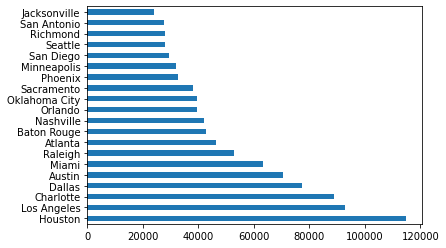

In [18]:
cities_by_accident[:20].plot(kind = 'barh')

* As we can see above Houston is leading followed by Los Angeles and Charlotte.( This could also be due to a skewed dataset as well, have to investigate further)

In [19]:
# Importing seaborn to make visualizations
import seaborn as sns
sns.set_style('darkgrid')

In [20]:
# Segregating cities by number of accidents to high( >1000 accidents) or low( <1000 accidents)
h_accident_cities = cities_by_accident[cities_by_accident >= 1000]
l_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [21]:
len(h_accident_cities)

704

In [22]:
# Accident prone cities as a percentage of the total data
100 * (len(h_accident_cities)/len(cities_by_accident))

5.746938775510204

In [23]:
# Cities with relatively lower counts of accidents as a percentage of the total data
100 * (len(l_accident_cities)/len(cities_by_accident))

94.2530612244898

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


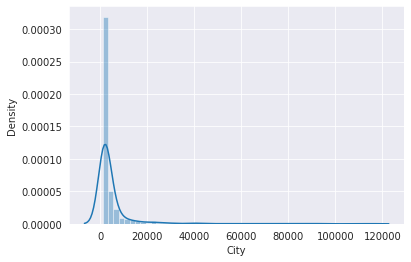

In [24]:
sns.distplot(h_accident_cities)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


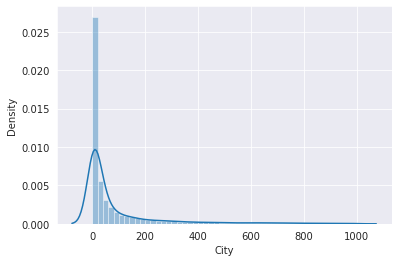

In [25]:
sns.distplot(l_accident_cities)

* Checking the datatype of Start Type in the dataframe before analysis.
* We have to convert into an appropriate datatype before proceeding.

In [26]:
df.Start_Time.value_counts()

2020-12-16 13:53:25    109
2020-09-30 12:41:30     80
2017-05-15 09:22:55     74
2020-12-16 13:54:00     61
2020-10-12 11:13:30     60
                      ... 
2020-09-13 09:23:51      1
2017-06-17 12:15:35      1
2019-04-20 17:13:53      1
2017-08-22 15:29:37      1
2018-12-08 08:30:17      1
Name: Start_Time, Length: 3657563, dtype: int64

In [27]:
# Checking the datatype of the datetime column
df.Start_Time.dtype

dtype('O')

* As we can see above Start Time has a datatype of object, we have to convert into datetime to be useful in our analysis

In [28]:
# Convering Object type to Datetime
df.Start_Time = pd.to_datetime(df.Start_Time)

In [29]:
df.Start_Time.dt.hour

0           5
1           6
2           6
3           7
4           7
           ..
4232536    18
4232537    19
4232538    19
4232539    19
4232540    18
Name: Start_Time, Length: 4232541, dtype: int64

####2.1 Accidents per Hour of the Day

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


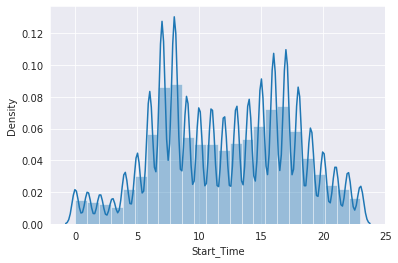

In [30]:
# Plotting to check the hours when most accidents occur
sns.distplot(df.Start_Time.dt.hour, bins = 24, norm_hist=True)

* Observations from the above plot:
  * There are two peaks between:
    1. morning 6am - 9am
    2. afternoon 3pm - 6pm
* These peaks conicide with the peak time to get to and back from office.
* There are more vehicles on road during these times and consequently the chances of accidents increases.

###2.2 Accidents per Day of the Week

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


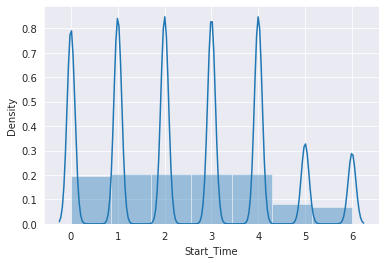

In [31]:
# Plotting to check the days of the week when most accidents occur
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, norm_hist = True)

* Observations from the above plot:
 * Weekends(5 : Saturday and 6 : Sunday) have comparatively less accidents.
 * We can infer this could be bacause of the comparatively fewer cars on roads, and people not being in an hurry.

###2.3 Accidents per day for two days Sunday and Monday to Compare and Contrast the differences in these two(Weekend and Weekday).  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


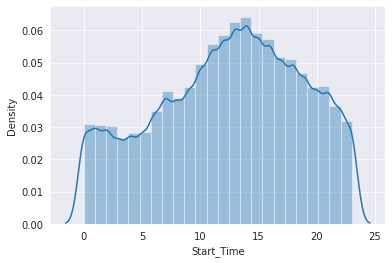

In [32]:
# Checking the Start Time for Sunday(6) 
sun_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sun_start_time.dt.hour, bins = 24, norm_hist = True)

* Observation from above plot:
  *  Accident frequency on Sundays start increasing from 9 am onwards constanly increasing until 2pm, after which it starts dropping.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


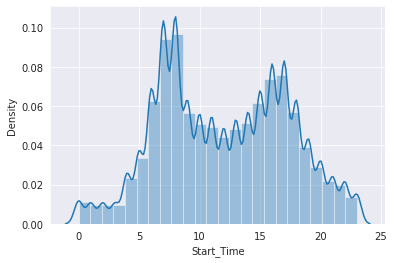

In [33]:
# Checking Start Time for Monday(0)
mon_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
sns.distplot(mon_start_time.dt.hour, bins = 24, norm_hist = True)

* Observation from above plot, we can clearly see two peaks between:
    1. morning 6am - 9am
    2. afternoon 3pm - 6pm
* These peaks conicide with the peak time to get to and back from office on weekdays.
* There are more vehicles on road on weekdays and consequently the chances of accidents increases.

###2.4 Accidents per month

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


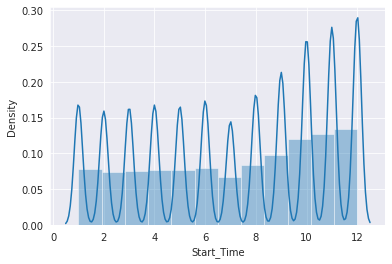

In [34]:
sns.distplot(df.Start_Time.dt.month, bins = 12, norm_hist = True)

* There seems to be trend for higher accidents during winters, but that can't be said with certainty, have to investigate more.

###2.5 Frequency of monthly accidents per hour 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


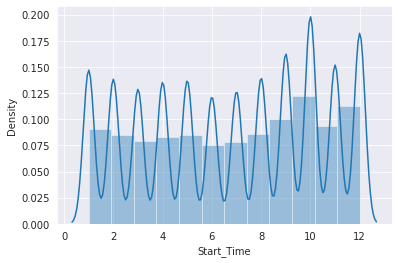

In [35]:
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month,bins = 12,norm_hist=True)

* It is fairly uniform accross, not much can be infered

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


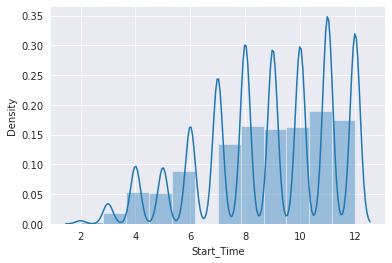

In [36]:
# Checking the data for year 2016
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month,bins = 12,norm_hist=True)

* We see left skewed data above, we have more data for the later months for the year.
* This could be one of the reasons for realtively higher frequency we saw earlier for the winter months.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


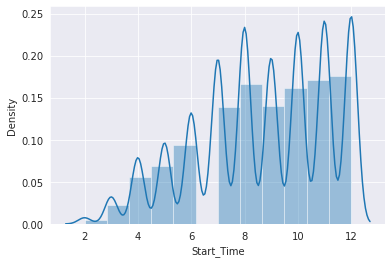

In [37]:
df_2016 = df[df.Start_Time.dt.year == 2016]
df_2016_Bing = df_2016[df_2016.Source == 'Bing']
sns.distplot(df_2016_Bing.Start_Time.dt.month,bins = 12,norm_hist=True)

* We check the data source 'Bing' for the Year 2016 and get the above left skewed data, we have more data for the later months for the year.
* This could be one of the reasons for realtively higher frequency we saw earlier for the winter months.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


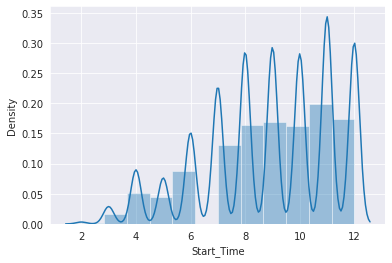

In [38]:
df_2016 = df[df.Start_Time.dt.year == 2016]
df_2016_MapQuest = df_2016[df_2016.Source == 'MapQuest']
sns.distplot(df_2016_MapQuest.Start_Time.dt.month,bins = 12,norm_hist=True)

* We check the data source 'MapQuest' for the Year 2016 and get the above left skewed data, we have more data for the later months for the year.
* This could be one of the reasons for realtively higher frequency we saw earlier for the winter months.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


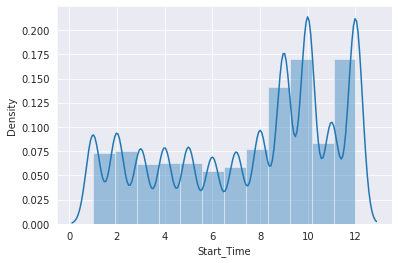

In [39]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_Bing = df_2019[df_2019.Source == 'Bing']
sns.distplot(df_2019_Bing.Start_Time.dt.month,bins = 12,norm_hist=True)

* We check the data source 'Bing' for the Year 2019 and get the above left skewed data, we have more data for the later months for the year.
* This could be one of the reasons for realtively higher frequency we saw earlier for the winter months.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


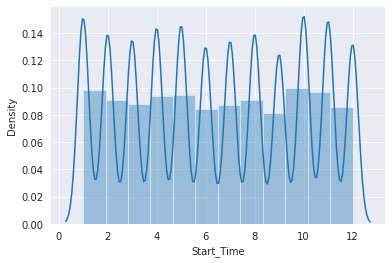

In [40]:
df_2019 = df[df.Start_Time.dt.year == 2019]
df_2019_MapQuest = df_2019[df_2019.Source == 'MapQuest']
sns.distplot(df_2019_MapQuest.Start_Time.dt.month,bins = 12,norm_hist=True)

* We check the data source 'MapQuest' for the Year 2019 and get the relatively uniform distribution.
* This data source seems a more reliable data source.
* We can Discard data from Source 'Bing' as it contains a large amount of unreliable data
* As our dataset is huge we will still have enough data to analyse

##2.6 Checking the Latitude and Longitude of the places where the accidents occur

In [42]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [43]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

In [45]:
# Taking a smaller sample size 
sample_df = df.sample(int(0.1 * len(df)))

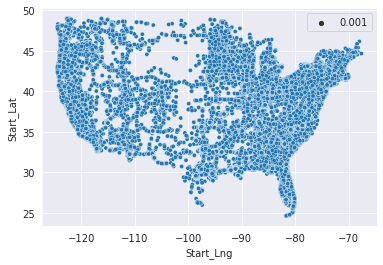

In [46]:
# Plotting accidents based on their latitude and longitude
sns.scatterplot(x = sample_df.Start_Lng,y = sample_df.Start_Lat, size = 0.001)

* We can see most accidents are concentrated on the east and west coast areas, this is where most of the major cities and population centeres are.


###2.6.1 Visualizing the accident heatmap for US

In [47]:
import folium
from folium.plugins import HeatMap

In [48]:
lat, lon = df.Start_Lat[0], df.Start_Lng[0]
lat, lon

(39.865147, -84.058723)

In [51]:
sample_df = df.sample(int(0.01*len(df)))
lat_lon = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [52]:
map = folium.Map()
HeatMap(lat_lon).add_to(map)
map

## Summary and Conclusions
* Around 5.75% cities have more than 1000 accidents, rest of the cities(94.25%) have a low accident of less than 1000
* There are two peak times when most accidents occurs between:
  * 6am to 10am (most people maybe trying to get to work, there will be a relatively higher density of cars on the street during this time, increasing the chances of accidents.)
  * 3pm to 6pm (most people returning from work, there will be a relatively higher density of cars on the street during this time, increasing the chances of accidents.)
* Weekends have have lower accidents
* A lot of data is missing for the year 2016.
* There is some issue with 'Bing' as a data source.
* Preventing these peak times and picking a safer slot to travel could be helpful.


